In [28]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the IMDB Dataset

In [10]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words = 10000)

In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
train_labels[0]

1

In [13]:
max([max(sequence) for sequence in train_data])
9999

9999

In [68]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key)for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Encoding the Integer into a Binary Matrix

In [69]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [70]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# The Model Definition

In [72]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling The Model

In [80]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configuring The Optimizer

In [81]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

C:\Users\Mehvish\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Using Custom Losses and Metrics

In [82]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

# Setting aside a Validation Set

In [83]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training your Model

In [86]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 59ms/step - loss: 0.0086 - acc: 0.9979 - val_loss: 0.7549 - val_acc: 0.8681
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.7932 - val_acc: 0.8679
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.8161 - val_acc: 0.8665
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 6.9463e-04 - acc: 1.0000 - val_loss: 0.8460 - val_acc: 0.8657
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 5.6866e-04 - acc: 1.0000 - val_loss: 0.9248 - val_acc: 0.8628
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 4.8073e-04 - acc: 1.0000 - val_loss: 0.9081 - val_acc: 0.8653
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 2.9968e-04 - acc: 1.0000 - val_loss: 0.9437 - val_acc: 0.8655
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - 

In [87]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plotting the Training and Validation Loss

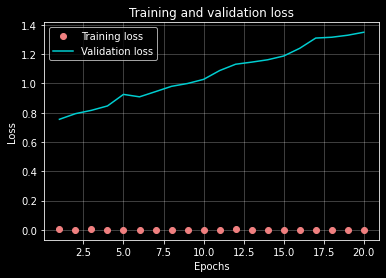

In [90]:
plt.style.use('dark_background')
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss',color='lightcoral')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss',color='darkTurquoise')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='white',alpha=0.3)
plt.legend()
plt.show()

# Plotting the Training and Validation uracy

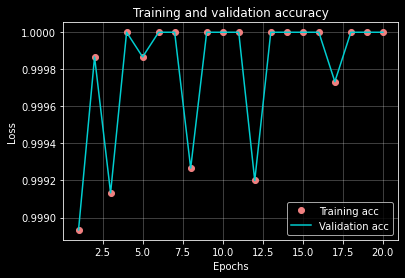

In [97]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc',color='lightcoral')
plt.plot(epochs, acc_values, 'b', label='Validation acc',color='DarkTurquoise')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='white',alpha=0.3)
plt.legend()
plt.show()

# Retraining a Model from Scratch

In [98]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5589 - accuracy: 0.7327
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2759 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2052 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 8s 3ms/step - loss: 0.3348 - accuracy: 0.8679


In [99]:
results

[0.3347795009613037, 0.8679199814796448]

In [100]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.50048

# Generating Predictions for New Data 

In [102]:
predictions = model.predict(x_test)

In [103]:
predictions[0].shape

(1,)

In [104]:
np.sum(predictions[0])

0.1281771

In [105]:
np.argmax(predictions[0])

0

In [106]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [107]:
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

# A Model with an Infromation Bottleneck

In [112]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=128,
            validation_data=(x_val, y_val))

Epoch 1/20


ValueError: in user code:

    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Mehvish\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Mehvish\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Mehvish\anaconda3\lib\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Mehvish\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 46) are incompatible


# Loading the Boston housing Dataset

In [113]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 2us/step


In [114]:
train_data.shape

(404, 13)

In [115]:
test_data.shape

(102, 13)

In [116]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# Normalizing the Data

In [117]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Model Definition

In [120]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',

    input_shape=(train_data.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K-fold Validation

In [121]:
k=4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [122]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [123]:
all_scores

[2.1157517433166504, 2.679752826690674, 2.7787792682647705, 2.451932430267334]

In [124]:
np.mean(all_scores)

2.506554067134857

# Saving the Validation Logs at each Fold

In [127]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0


KeyError: 'val_mean_absolute_error'

# Building The History of Success mean K-fold Validation scores

In [128]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

C:\Users\Mehvish\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mehvish\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
